In [139]:
#%matplotlib notebook
%matplotlib inline

In [140]:
# import dependencies
import pandas as pd
import sklearn.datasets as dta
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

In [141]:
# Import the WHO dataset, drop missing data
meta_data = pd.read_csv('/Users/russ/Downloads/Mouse_metadata.csv')
study_data = pd.read_csv('/Users/russ/Downloads/Study_results.csv')

# merge the two dataframes
cancer_data = pd.merge(meta_data, study_data, on = 'Mouse ID', how = 'left')
cancer_data

# data cleansing
# drop all the missing data if there is any
#cancer_data_df.dropna()

# check the dataframe details i.e column counts and dtype among others
#cancer_data_df.value_counts()

# drop all duplicate data with same timpoint and mouse ID
#cancer_data=cancer_data_df.drop_duplicates(subset=['Timepoint','Mouse ID'])

# check the residual data in this case 4 rows of duplicates were removed 
# cleaned data is vital in getting accurate insights 
#cancer_data.value_counts()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [142]:
# calculate summary statistics mean, median, variance, standard deviation and SEM
# use aggregate function to create a summary stat table
# sourced from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html
# group the data by drug regimen 
regimen1_data = cancer_data.groupby('Drug Regimen')
regimen_data = regimen1_data.aggregate(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
regimen_data

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [143]:
# as grouped earlier, add count for ease of plotting
# set the grouped series to a dataframe to use plot function
regimen1_data = cancer_data.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
reg = pd.DataFrame(regimen1_data)
reg

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


Text(0, 0.5, 'count of mise used in (hundreds)')

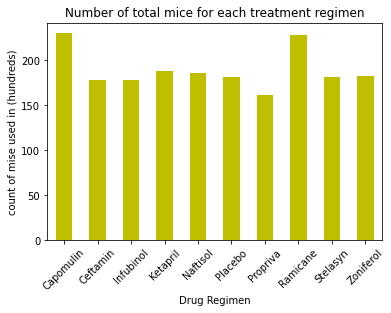

In [144]:
# plot the dataframe using the plot function
reg.plot.bar(legend=False,rot=45,color= 'y',align= 'center')
plt.title('Number of total mice for each treatment regimen')
plt.xlabel('Drug Regimen')
plt.ylabel("count of mise used in (hundreds)")

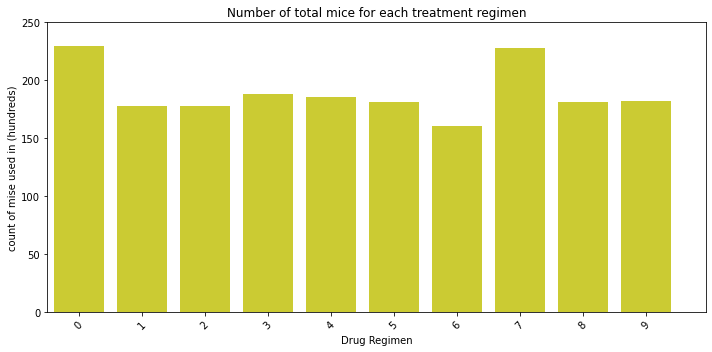

In [145]:
# Set x axis and tick locations
x_axis = np.arange(len(reg))

tick_locations = [item for item in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,5))
plt.bar(x_axis, reg['Tumor Volume (mm3)'], color='y', alpha=0.8)
plt.xticks(tick_locations, rotation="45")
plt.tight_layout()

# Set x and y limits
plt.xlim(-.5, len(x_axis)-.05)
plt.ylim(0, 250)

# Set a Title and labels
plt.title('Number of total mice for each treatment regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('count of mise used in (hundreds)')

# Save our graph and show the grap
plt.tight_layout()
plt.savefig("/Users/russ/Desktop/matplotlib_challenge")
plt.show()

In [146]:
sex = cancer_data.groupby('Sex').count()
sex

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,935,935,935,935,935,935,935
Male,958,958,958,958,958,958,958


In [147]:
labels = list(sex.index)
labels

['Female', 'Male']

In [148]:
sizes = sex['Mouse ID']
sizes

Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64

([<matplotlib.patches.Wedge at 0x7fefc9338490>,
 [Text(-0.7230187918402547, -0.8290017048509963, 'Female'),
  Text(0.723018791840255, 0.8290017048509963, 'Male')],
 [Text(-0.3943738864583208, -0.4521827481005434, '49.4%'),
  Text(0.39437388645832083, 0.4521827481005434, '50.6%')])

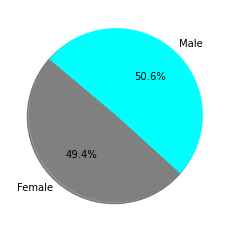

In [149]:
# labels for the sections of pie chart
labels = list(sex.index)
# values for each section of the pie chart
sizes = sex['Mouse ID']
# color of the pie chart section
colors = ['grey','cyan']

# plot the pie chart
plt.pie(sizes, labels=labels,colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)

<AxesSubplot:ylabel='Mouse ID'>

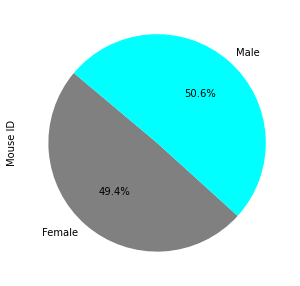

In [150]:
colors = ['grey','cyan']
sexpie = sex['Mouse ID'].plot.pie(y='sizes', figsize=(5, 5), colors=colors, autopct="%1.1f%%",startangle=140)
sexpie

In [173]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin#
capomulin = cancer_data.groupby(['Drug Regimen']).get_group(('Capomulin'))

# Start by getting the last (greatest) timepoint for each mouse
capomulin_df = pd.DataFrame(capomulin.groupby(['Mouse ID']).max()['Timepoint'])

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capomulin_final = pd.merge(capomulin_df, cancer_data, on = 'Timepoint', how = 'inner')
capomulin_final.head()

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,k403,Ramicane,Male,21,16,22.050126,1
1,45,s185,Capomulin,Female,3,17,23.343598,1
2,45,x401,Capomulin,Female,16,15,28.484033,0
3,45,m601,Capomulin,Male,22,17,28.430964,1
4,45,g791,Ramicane,Male,11,16,29.128472,1


In [171]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens
# create a list for final plotting
tumorVol_capomulin = capomulin_final['Tumor Volume (mm3)']

# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = tumorVol_capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#print(f"The lower quartile of tumor volume  is: {lowerq}")
#print(f"The upper quartile of tumor volume is: {upperq}")
#print(f"The interquartile range of tumor volume is: {iqr}")
#print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 2.0406202450000066 could be outliers.
Values above 107.483021565 could be outliers.


In [174]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin#
ramicane = cancer_data.groupby(['Drug Regimen']).get_group(('Ramicane'))

# Start by getting the last (greatest) timepoint for each mouse
ramicane_df = pd.DataFrame(ramicane.groupby(['Mouse ID']).max()['Timepoint'])

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ramicane_final = pd.merge(ramicane_df, cancer_data, on = 'Timepoint', how = 'inner')
ramicane_final.head()

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,k403,Ramicane,Male,21,16,22.050126,1
1,45,s185,Capomulin,Female,3,17,23.343598,1
2,45,x401,Capomulin,Female,16,15,28.484033,0
3,45,m601,Capomulin,Male,22,17,28.430964,1
4,45,g791,Ramicane,Male,11,16,29.128472,1


In [175]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens
# create a list for final plotting
tumorVol_ramicane = ramicane_final['Tumor Volume (mm3)']

# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = tumorVol_ramicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#print(f"The lower quartile of tumor volume  is: {lowerq}")
#print(f"The upper quartile of tumor volume is: {upperq}")
#print(f"The interquartile range of tumor volume is: {iqr}")
#print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 2.425448920000008 could be outliers.
Values above 106.84164043999999 could be outliers.


In [176]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin#
infubinol = cancer_data.groupby(['Drug Regimen']).get_group(('Infubinol'))

# Start by getting the last (greatest) timepoint for each mouse
infubinol_df = pd.DataFrame(infubinol.groupby(['Mouse ID']).max()['Timepoint'])

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
infubinol_final = pd.merge(infubinol_df, cancer_data, on = 'Timepoint', how = 'inner')
infubinol_final.head()

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,k403,Ramicane,Male,21,16,22.050126,1
1,45,s185,Capomulin,Female,3,17,23.343598,1
2,45,x401,Capomulin,Female,16,15,28.484033,0
3,45,m601,Capomulin,Male,22,17,28.430964,1
4,45,g791,Ramicane,Male,11,16,29.128472,1


In [178]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens
# create a list for final plotting
tumorVol_infubinol = infubinol_final['Tumor Volume (mm3)']

# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = tumorVol_infubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#print(f"The lower quartile of tumor volume  is: {lowerq}")
#print(f"The upper quartile of tumor volume is: {upperq}")
#print(f"The interquartile range of tumor volume is: {iqr}")
#print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 22.374523705 could be outliers.
Values above 84.479904385 could be outliers.


In [179]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin#
ceftamin = cancer_data.groupby(['Drug Regimen']).get_group(('Ceftamin'))

# Start by getting the last (greatest) timepoint for each mouse
ceftamin_df = pd.DataFrame(ceftamin.groupby(['Mouse ID']).max()['Timepoint'])

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ceftamin_final = pd.merge(ceftamin_df, cancer_data, on = 'Timepoint', how = 'inner')
ceftamin_final.head()

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,k403,Ramicane,Male,21,16,22.050126,1
1,45,s185,Capomulin,Female,3,17,23.343598,1
2,45,x401,Capomulin,Female,16,15,28.484033,0
3,45,m601,Capomulin,Male,22,17,28.430964,1
4,45,g791,Ramicane,Male,11,16,29.128472,1


In [180]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens
# create a list for final plotting
tumorVol_ceftamin = ceftamin_final['Tumor Volume (mm3)']

# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = tumorVol_ceftamin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#print(f"The lower quartile of tumor volume  is: {lowerq}")
#print(f"The upper quartile of tumor volume is: {upperq}")
#print(f"The interquartile range of tumor volume is: {iqr}")
#print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 18.49386144 could be outliers.
Values above 89.1768976 could be outliers.


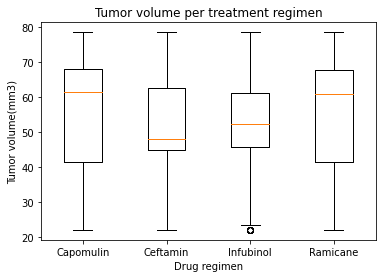

In [181]:
# create final list for plotting
box_list = [tumorVol_capomulin,tumorVol_ceftamin,tumorVol_infubinol,tumorVol_ramicane]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor volume per treatment regimen')
ax1.set_ylabel('Tumor volume(mm3)')
ax1.set_xlabel('Drug regimen')
ax1.boxplot(box_list, labels=['Capomulin','Ceftamin','Infubinol','Ramicane'])
plt.show()